Reading files, extracting features and adding labels:

In [ ]:
from scipy.io import loadmat
import numpy as np
from random import shuffle
import eeglib.features as eeg

#reading files
S2T2B1 = loadmat("S2T2B1.mat")
S2T2B2 = loadmat("S2T2B2.mat")
B1 = list(S2T2B1['a'])
B2 = list(S2T2B2['a'])
B = B1 + B2

Feature extraction and spliting data into different parts:

In [153]:
def data_split(B, time_slot):
    data =[]
    period = np.shape(B)[2]/50 - 1
    i = 0 
    for b in B:
        new_data = []
        for channel in b:
            new_data.append([eeg.DFA(channel[int(time_slot):int(time_slot+period)]),
                             eeg.HFD(channel[int(time_slot):int(time_slot+period)])])
        #creating labels:
        if i < len(B1):
            new_data = np.append(new_data, [0])  
        else:
            new_data = np.append(new_data, [1])
        #create dataset
        data.append(new_data)
        i +=1
    #shuffle dataset
    shuffle(data)
    return data

Train Test split:


In [154]:
import math
import random

def test_train_split(data, seed):
    #shuffle dataset
    random.seed(seed)
    shuffle(data)

    train = data[:math.floor(len(data) * 0.7)]
    test = data[math.floor(len(data) * 0.7):]

    #split train's label and features
    X_train = []
    y_train = []
    for d in train:
        X_train.append(d[:-1])
        y_train.append(d[-1])

    #split test's labels and feature
    X_test = []
    y_test = []
    for d in test:
        X_test.append(d[:-1])
        y_test.append(d[-1])
    return X_train, y_train, X_test, y_test

classifier:

In [194]:
import numpy as np
from sklearn.metrics import accuracy_score

def CLASSIFIER(clf, x_train , y_train , x_test , y_test):
  clf.fit(x_train,y_train) 
  pred = clf.predict(x_test)
  score = accuracy_score(pred, y_test)
  return score

IQR Plot:

In [215]:
import matplotlib.pyplot as plt
import numpy as np
import math

def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
  plt.fill_between(range(len(mean)), ub, lb, color=color_shading, alpha=.5)
  plt.plot(mean, color_mean)
  plt.show()

def find_iqr(data):
  mean = np.mean(data)
  n = len(data)
  s = np.std(data)
  An = 1.96
  confidence = An * s / math.sqrt(n)
  return mean ,confidence

def diagram(data):
  size = np.shape(data)[0]
  up = []
  down = [] 
  mean = []
  for i in range(size):
    new_mean , confidence = find_iqr(data[i])
    mean.append(new_mean)
    up.append(new_mean + confidence)
    down.append(new_mean - confidence)

  plot_mean_and_CI(mean, down, up, color_mean='g', color_shading='b')

Training all models:

SVC() :


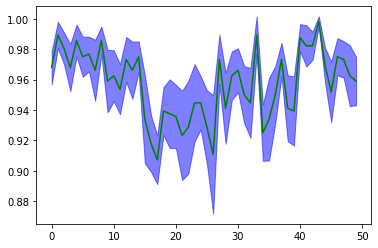

GaussianNB() :


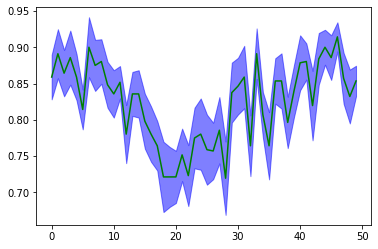

DecisionTreeClassifier() :


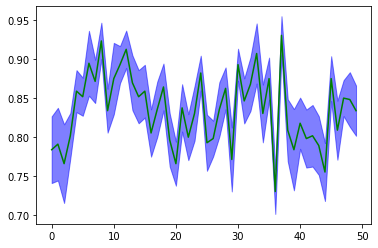

KNeighborsClassifier(n_neighbors=4) :


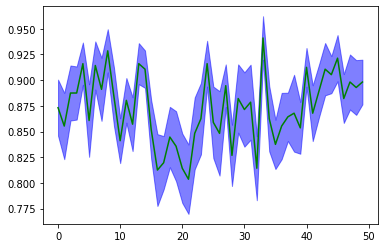

MLPClassifier(max_iter=1000) :


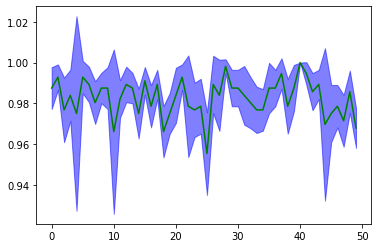

In [216]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

classifiers = [SVC(), GaussianNB(), DecisionTreeClassifier(), 
              KNeighborsClassifier(n_neighbors=4), MLPClassifier(max_iter=1000)]

random_seed = [10*i for i in range(20)]

period = np.shape(B)[2]/50
time_slots = [period*i for i in range(50)]

for classifier in classifiers:
    continious_score = []
    for t in time_slots:
        scores = []
        data = data_split(B, t)
        for seed in random_seed:
            X_train, y_train, X_test, y_test = test_train_split(data, seed)
            s = CLASSIFIER(classifier, X_train, y_train, X_test, y_test)
            scores.append(s)
        continious_score.append(scores)
    print(classifier, ":")
    diagram(continious_score)